# Explore here

PROYECTO API

In [43]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables

load_dotenv()


client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
print(client_id, client_secret)


3d7d24640e904d3f8668d06dd46dc533 6e8fd5d3ba4f43e8802b20a30c01fa2f


In [46]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

artist_id="7eBQrhxTHcor6gcbcLhqE5"


# Configurar autenticación
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,
                                                                              client_secret=client_secret))

# Obtener las canciones más populares del artista
result = spotify.artist_top_tracks(artist_id)


In [47]:
# load the .env file variables
load_dotenv()
canciones=[]
popularidad=[]
duracion=[]

for track in result['tracks'][:20]:
    print('track    : ' + track['name'])
    canciones.append(track['name'])
    popularidad.append(track['popularity'])
    duracion.append(track['duration_ms']/(1000*60)%60)

track    : Host of a Ghost
track    : Espiral
track    : Cachito De Galaxia
track    : Pájaros
track    : Huitzil
track    : Rincón Yucateco
track    : Himno Eterno
track    : La China
track    : Xoloitzcuintle Chicloso
track    : Murciélago


In [54]:

df=pd.DataFrame()
df["canciones"]=canciones
df["popularidad"]=popularidad
df["duracion"]=duracion
df


,canciones,popularidad,duracion
0,Host of a Ghost,51,4.341100
1,Espiral,51,5.366883
2,Cachito De Galaxia,50,4.950883
3,Pájaros,50,5.418667
4,Huitzil,48,4.069583
5,Rincón Yucateco,45,4.490300
6,Himno Eterno,43,6.331550
7,La China,42,5.739150
8,Xoloitzcuintle Chicloso,42,9.399767
9,Murciélago,42,4.555983


In [60]:
duracion_media = df['duracion'].mean()
print(duracion_media)


5.466386666666667


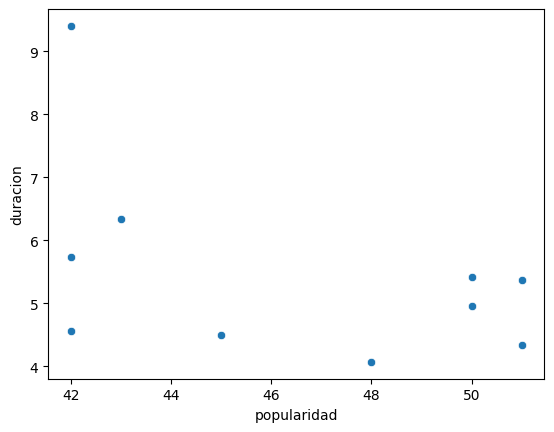

In [56]:

scatter_plot = sns.scatterplot(data = df, x = "popularidad", y = "duracion")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")


-Las canciones con mayor duración son las menos populares
Teniendo como base el dato de la media de la duracion 
-La mayoria de las canciones que se encuentran mas cerca de la media son las mas populares

Este grafico tiene una dispersion entre puntos, asi que estas variables no tienen una relación fuerte.
